In [2]:
# !pip install ultralytics

In [4]:
# !pip install labelme2yolo

In [6]:
# !pip install opencv-python-headless

In [11]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# GeoTiff Images
import rasterio
from osgeo import gdal

# Visualisation
from matplotlib import pyplot as plt
import matplotlib.image as img
from matplotlib.pyplot import figure
from PIL import Image
%matplotlib inline

# Model Building
import ultralytics
from ultralytics import YOLO
import labelme2yolo

# Others
import os
import shutil
import zipfile
import csv
from tqdm import tqdm

In [14]:
!labelme2yolo --json_dir ./training_data_10/

INFO:labelme2yolo:Converting train set ...
Converting... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:0000:0100:01
INFO:labelme2yolo:Converting val set ...
Converting... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00m 0:00:01
INFO:labelme2yolo:Converting test set ...
Converting... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% -:--:--


In [15]:
def copy_files(source_dir, dest_dir):
    for filename in tqdm(os.listdir(source_dir)):
        if os.path.isfile(os.path.join(source_dir, filename)):
            source_path = os.path.join(source_dir, filename)
            destination_path = os.path.join(dest_dir, filename)
            shutil.copy2(source_path, destination_path)

In [16]:
#copy images
source_train = os.getcwd() + '/training_data_10/YOLODataset/images/train'
source_val = os.getcwd() + '/training_data_10/YOLODataset/images/val'

train_dir = os.getcwd() + '/training_data_10/YOLODataset/datasets/train'
val_dir = os.getcwd() + '/training_data_10/YOLODataset/datasets/val'
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

copy_files(source_train, train_dir)
copy_files(source_val, val_dir)

100%|██████████| 60/60 [00:00<00:00, 1409.16it/s]


In [17]:
#copy labels
source_train = os.getcwd() + '/training_data_10/YOLODataset/labels/train'
source_val = os.getcwd() + '/training_data_10/YOLODataset/labels/val'
copy_files(source_train, train_dir)
copy_files(source_val, val_dir)

100%|██████████| 60/60 [00:00<00:00, 4534.87it/s]


In [18]:
#Loading the model
model = YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 152MB/s]


In [19]:
# Display model information (optional)
model.info()

YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs


(225, 3157200, 0, 8.8575488)

In [20]:
#changing yaml directory links
with open(os.getcwd()+'/training_data_10/YOLODataset/dataset.yaml', 'r') as file:
    lines = file.readlines()
lines[0] = 'train: ./datasets/train' + '\n'
lines[1] = 'val: ./datasets/val' + '\n'
with open(os.getcwd()+'/training_data_10/YOLODataset/dataset.yaml', 'w') as file:
    file.writelines(lines)

In [ ]:
# Train the model on the dataset for recommended initial 300 epochs
all_data_yaml = os.getcwd()+'/training_data_10/YOLODataset/dataset.yaml'
results = model.train(data=all_data_yaml, epochs=300, imgsz=512)

Ultralytics YOLOv8.1.24 🚀 Python-3.11.4 torch-2.2.1+cu121 CPU (Intel Xeon Platinum 8272CL 2.60GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/jovyan/EYChallenge/modeling_akash_tests/model_development_10/training_data_10/YOLODataset/dataset.yaml, epochs=300, time=None, patience=100, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=F

train: Scanning /home/jovyan/EYChallenge/modeling_akash_tests/model_development_10/training_data_10/YOLODataset/datasets/train... 239 images, 0 backgrounds, 0 corrupt: 100%|██████████| 239/239 [00:00<00:00, 459.72it/s]

train: New cache created: /home/jovyan/EYChallenge/modeling_akash_tests/model_development_10/training_data_10/YOLODataset/datasets/train.cache



val: Scanning /home/jovyan/EYChallenge/modeling_akash_tests/model_development_10/training_data_10/YOLODataset/datasets/val... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<00:00, 439.03it/s]

val: New cache created: /home/jovyan/EYChallenge/modeling_akash_tests/model_development_10/training_data_10/YOLODataset/datasets/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 512 train, 512 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300         0G      1.767       4.01      1.542        418        512: 100%|██████████| 15/15 [01:10<00:00,  4.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.34s/it]

                   all         60       1416    0.00225     0.0597     0.0114    0.00505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300         0G      1.574      3.008      1.295        625        512: 100%|██████████| 15/15 [01:13<00:00,  4.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.29s/it]

                   all         60       1416     0.0354       0.31      0.149     0.0803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300         0G      1.574      2.325      1.253        548        512: 100%|██████████| 15/15 [01:11<00:00,  4.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.39s/it]

                   all         60       1416       0.72      0.217      0.201      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300         0G      1.549       2.01      1.214        443        512: 100%|██████████| 15/15 [01:09<00:00,  4.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.11s/it]

                   all         60       1416       0.17      0.316      0.201      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300         0G      1.514      1.832       1.19        575        512: 100%|██████████| 15/15 [01:11<00:00,  4.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.62s/it]

                   all         60       1416      0.168      0.315      0.206      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300         0G      1.479      1.712      1.209        631        512: 100%|██████████| 15/15 [01:19<00:00,  5.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.85s/it]

                   all         60       1416      0.215      0.351      0.246      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300         0G      1.434      1.619      1.216        660        512: 100%|██████████| 15/15 [01:19<00:00,  5.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.08s/it]

                   all         60       1416      0.232      0.318      0.238      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300         0G      1.442      1.622      1.196        658        512: 100%|██████████| 15/15 [01:16<00:00,  5.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.30s/it]

                   all         60       1416        0.2      0.388      0.231       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300         0G       1.39      1.561       1.18        430        512: 100%|██████████| 15/15 [01:21<00:00,  5.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.72s/it]

                   all         60       1416      0.221      0.392      0.249      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300         0G      1.366      1.495      1.184        603        512: 100%|██████████| 15/15 [01:12<00:00,  4.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.85s/it]

                   all         60       1416      0.208      0.314      0.234      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300         0G       1.32      1.446       1.16        607        512:  60%|██████    | 9/15 [00:47<00:30,  5.12s/it]

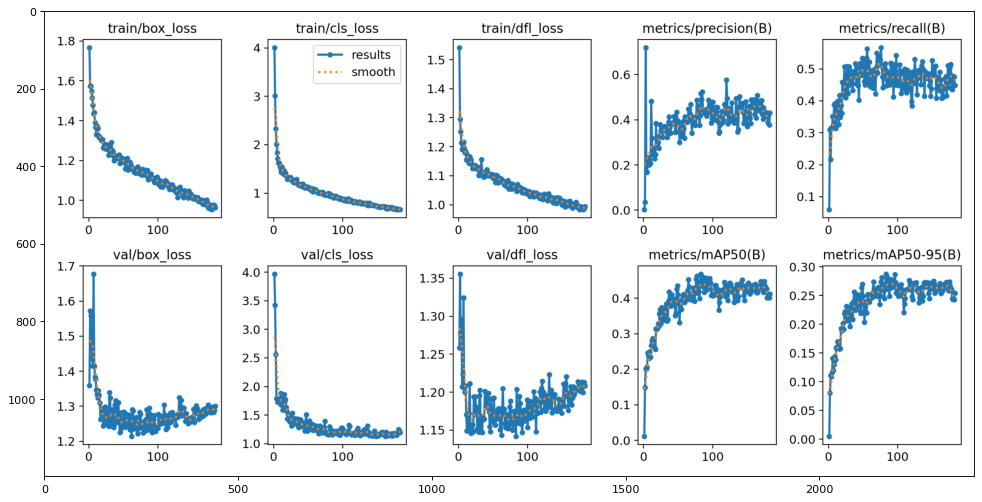

In [22]:
figure(figsize=(15, 10), dpi=80)
# reading the image 
results = img.imread('./runs/detect/train/results.png')   
# displaying the image 
plt.imshow(results)

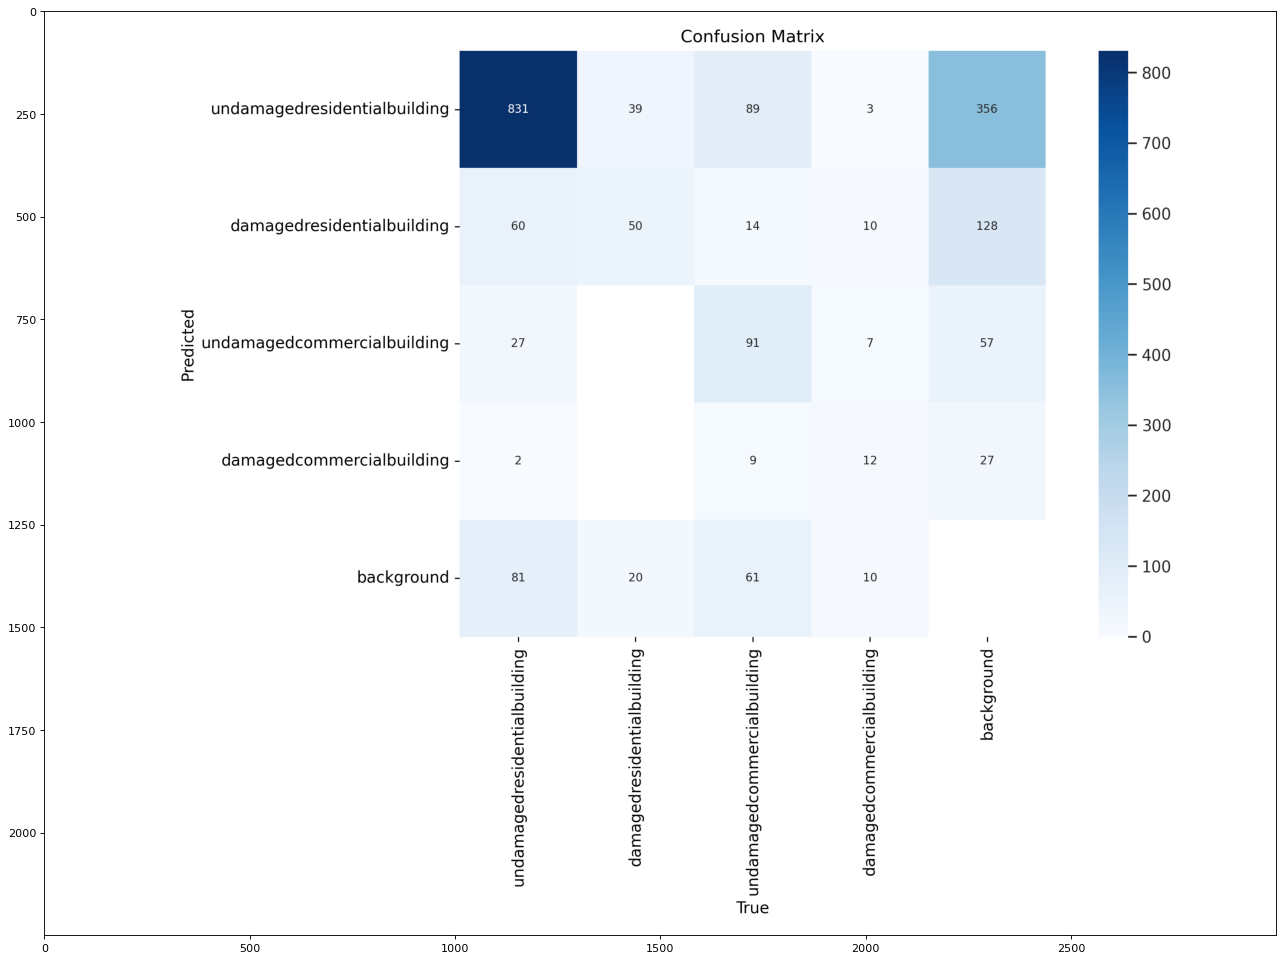

In [23]:
figure(figsize=(20,15), dpi=80)  
# reading the image 
cf = img.imread('./runs/detect/train/confusion_matrix.png') 
# displaying the image 
plt.imshow(cf)

In [25]:
# Load the Model
model = YOLO('./runs/detect/train/weights/best.pt')

In [26]:
# Decoding according to the .yaml file class names order
decoding_of_predictions ={0: 'undamagedresidentialbuilding', 1: 'damagedresidentialbuilding', 2: 'undamagedcommercialbuilding', 3: 'damagedcommercialbuilding'}

directory = 'challenge_1_submission_images/'
# Directory to store outputs
results_directory = './Validation_Data_Results'

# Create submission directory if it doesn't exist
if not os.path.exists(results_directory):
    os.makedirs(results_directory)

# Loop through each file in the directory
for filename in os.listdir(directory):
    # Check if the current object is a file and ends with .jpeg
    if os.path.isfile(os.path.join(directory, filename)) and filename.lower().endswith('.jpg'):
        # Perform operations on the file
        file_path = os.path.join(directory, filename)
        print(file_path)
        print("Making a prediction on ", filename)
        results = model.predict(file_path, save=True, iou=0.5, save_txt=True, conf=0.25)
        
        for r in results:
            conf_list = r.boxes.conf.numpy().tolist()
            clss_list = r.boxes.cls.numpy().tolist()
            original_list = clss_list
            updated_list = []
            for element in original_list:
                 updated_list.append(decoding_of_predictions[int(element)])

        bounding_boxes = r.boxes.xyxy.numpy()
        confidences = conf_list
        class_names = updated_list

        # Check if bounding boxes, confidences and class names match
        if len(bounding_boxes) != len(confidences) or len(bounding_boxes) != len(class_names):
            print("Error: Number of bounding boxes, confidences, and class names should be the same.")
            continue
        text_file_name = os.path.splitext(filename)[0]
        # Creating a new .txt file for each image in the submission_directory
        with open(os.path.join(results_directory, f"{text_file_name}.txt"), "w") as file:
            for i in range(len(bounding_boxes)):
                # Get coordinates of each bounding box
                left, top, right, bottom = bounding_boxes[i]
                # Write content to file in desired format
                file.write(f"{class_names[i]} {confidences[i]} {left} {top} {right} {bottom}\n")
        print("Output files generated successfully.")

challenge_1_submission_images/Validation_Post_Event_011.jpg
Making a prediction on  Validation_Post_Event_011.jpg

image 1/1 /home/jovyan/EYChallenge/modeling_akash_tests/model_development_10/challenge_1_submission_images/Validation_Post_Event_011.jpg: 512x512 13 undamagedresidentialbuildings, 3 damagedresidentialbuildings, 1 undamagedcommercialbuilding, 1703.5ms
Speed: 21.5ms preprocess, 1703.5ms inference, 41.3ms postprocess per image at shape (1, 3, 512, 512)
Results saved to runs/detect/predict
1 label saved to runs/detect/predict/labels
Output files generated successfully.
challenge_1_submission_images/Validation_Post_Event_005.jpg
Making a prediction on  Validation_Post_Event_005.jpg

image 1/1 /home/jovyan/EYChallenge/modeling_akash_tests/model_development_10/challenge_1_submission_images/Validation_Post_Event_005.jpg: 512x512 27 undamagedresidentialbuildings, 12 damagedresidentialbuildings, 1 undamagedcommercialbuilding, 3605.7ms
Speed: 67.0ms preprocess, 3605.7ms inference, 6.

In [27]:
# Define your source directory and the destination where the zip file will be created
source_dir = results_directory
destination_zip = 'submission'

# Create a zip file from the directory
shutil.make_archive(destination_zip, 'zip', source_dir)

print(f"Directory {source_dir} has been successfully zipped into {destination_zip}.")

Directory ./Validation_Data_Results has been successfully zipped into submission.


In [28]:
!tar -cvf /home/jovyan/EYChallenge/modeling_akash_tests/model_development_10.tar /home/jovyan/EYChallenge/modeling_akash_tests/model_development_10

tar: Removing leading `/' from member names
/home/jovyan/EYChallenge/modeling_akash_tests/model_development_10/
/home/jovyan/EYChallenge/modeling_akash_tests/model_development_10/model_10.ipynb
/home/jovyan/EYChallenge/modeling_akash_tests/model_development_10/.ipynb_checkpoints/
/home/jovyan/EYChallenge/modeling_akash_tests/model_development_10/.ipynb_checkpoints/model_10-checkpoint.ipynb
/home/jovyan/EYChallenge/modeling_akash_tests/model_development_10/runs/
/home/jovyan/EYChallenge/modeling_akash_tests/model_development_10/runs/detect/
/home/jovyan/EYChallenge/modeling_akash_tests/model_development_10/runs/detect/predict/
/home/jovyan/EYChallenge/modeling_akash_tests/model_development_10/runs/detect/predict/Validation_Post_Event_011.jpg
/home/jovyan/EYChallenge/modeling_akash_tests/model_development_10/runs/detect/predict/Validation_Post_Event_005.jpg
/home/jovyan/EYChallenge/modeling_akash_tests/model_development_10/runs/detect/predict/Validation_Post_Event_007.jpg
/home/jovyan/EY